# Лабораторная работа №3 
## Выполнил студент группы БВТ1901 Рыбаков Егор Дмитриевич
### Задание №1
Реализовать методы поиска подстроки в строке. Добавить возможность ввода строки и подстроки с клавиатуры. Предусмотреть возможность существования пробела. Реализовать возможность выбора опции чувствительности или нечувствительности к регистру. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.
<ul>
    <li>Кнута-Морриса-Пратта</li>
    <li>Упрощенный Бойера-Мура</li>
</ul>

In [3]:
import time
def kmp(seped_s, sep_char):
    matches = []
    sep_char_pos = seped_s.index(sep_char)
    for i in range(sep_char_pos + 1, len(seped_s)):
        j = 0
        k = i
        tmp = ""
        tmp1 = ""
        maxn = 0
        if matches:
            maxStep = matches[-1] + 1
        else:
            maxStep = 0
        while j < sep_char_pos:
            tmp += seped_s[j]
            tmp1 += seped_s[k]
            k -= 1
            j += 1
            if tmp == tmp1[::-1]:
                maxn = len(tmp)
            if j > maxStep:
                break
        matches.append(maxn)
    return matches


#aabaabaaaabaabaaab
time_start = time.time()
baseLine = input("Введите исходную строку: ")
lineToFind = input("Введите строку для поиска: ")
sep_char = input("Введите символ, которого нет в исходной строке: ")
tmp_ans = kmp(lineToFind + sep_char + baseLine, sep_char)
print(tmp_ans)
for i in range(len(tmp_ans)):
    if tmp_ans[i] == len(lineToFind):
        for j in range(i - len(lineToFind) + 1, i + 1):
            print(j, end=" ")
        print()
print(time.time() - time_start)

Введите исходную строку: aabaabaaaabaabaaab
Введите строку для поиска: aabaa
Введите символ, которого нет в исходной строке: *
[1, 2, 3, 4, 5, 3, 4, 5, 2, 2, 3, 4, 5, 3, 4, 5, 2, 3]
0 1 2 3 4 
3 4 5 6 7 
8 9 10 11 12 
11 12 13 14 15 
7.1910176277160645


In [5]:
import time
def prefixbm(word):
    alphabet = [len(word)] * 256
    for i in range(len(word) - 1):
        alphabet[ord(word[i])] = len(word) - 1 - i
    return alphabet


def bm(string, word):
    coords = []
    T = prefixbm(word)
    skip = 0
    while len(string) - skip >= len(word):
        if string[skip:skip + len(word)] == word:
            coords.append((skip, skip + len(word)))
        skip += T[ord(string[skip + len(word) - 1])]
    return f"Word begins:ends at indexes {coords}"

time_start = time.time()
string = input("Введите слово: ")
word = input("Введите строку: ")
print(bm(string, word))
print(time.time() - time_start)

Введите слово: Hoola-Hoola Girls like Hooligans
Введите строку: Hooligan
Word begins:ends at indexes [(23, 31)]
21.801805019378662


### Задание №2
Игра в 15, пятнашки, такен — популярная головоломка, придуманная в 1878 году Ноем Чепмэном. Она представляет собой набор одинаковых квадратных костяшек с нанесёнными числами, заключённых в квадратную коробку. Длина стороны коробки в четыре раза больше длины стороны костяшек для набора из 15 элементов, соответственно в коробке остаётся незаполненным одно квадратное поле. Цель игры — перемещая костяшки по коробке, добиться упорядочивания их по номерам, желательно сделав как можно меньше перемещений.
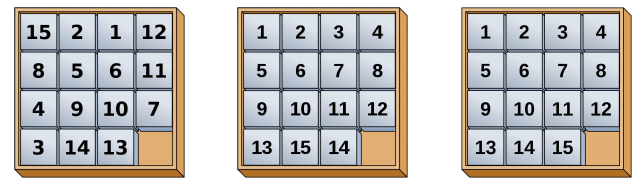
<ul>
    <li>Задача: </li>
написать программу, определяющую, является ли данное расположение «решаемым», то есть можно ли из него за конечное число шагов перейти к правильному. Если это возможно, то необходимо найти хотя бы одно решение - последовательность движений, после которой числа будут расположены в правильном порядке.
    <li> Входные данные: </li>
    массив чисел, представляющий собой расстановку в порядке «слева направо, сверху вниз». Число 0 обозначает пустое поле. Например, массив [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0] представляет собой «решенную» позицию элементов.
    <li> Выходные данные:</li>
    если решения нет, то функция должна вернуть пустой массив []. Если решение есть, то необходимо представить решение — для каждого шага записывается номер передвигаемого на данном шаге элемента.
    <li>Например:</li>
    для начального расположения элементов [1, 2, 3, 4, 5, 6, 7, 8, 13, 9, 11, 12, 10, 14, 15, 0] одним из возможных решений будет [15, 14, 10, 13, 9, 10, 14, 15] (последовательность шагов здесь: двигаем 15, двигаем 14, двигаем 10, …, двигаем 15).
</ul>

In [3]:

from queue import PriorityQueue
from random import shuffle

N = 4
SEARCH_TYPE = "greedy"  # implemented: greedy

def moves(position):
    blank = position.index(N * N - 1)
    i, j = divmod(blank, N)
    offsets = []
    if i > 0:
        offsets.append(-N)  # Down
    if i < N - 1:
        offsets.append(N)  # Up
    if j > 0:
        offsets.append(-1)  # Right
    if j < N - 1:
        offsets.append(1)  # Left
    for offset in offsets:
        swap = blank + offset
        yield tuple(
            position[swap] if x == blank else position[blank] if x == swap else position[x] for x in range(N * N))


def loss(position):
    return sum(abs(i // N - position[i] // N) + abs(i % N - position[i] % N) for i in range(N * N - 1))


def parity(permutation):
    # assert set(permutation) == set(range(N*N))
    # return sum(x<y and px>py for (x, px) in enumerate(permutation) for (y, py) in enumerate(permutation))%2
    seen, cycles = set(), 0
    for i in permutation:
        if i not in seen:
            cycles += 1
            while i not in seen:
                seen.add(i)
                i = permutation[i]
    return (cycles + len(permutation)) % 2


class Position:  # For PriorityQueue, to make "<" do the right thing.
    def __init__(self, position, start_distance):
        self.position = position
        self.loss = loss(position)
        self.start_distance = start_distance

    def __lt__(self, other):
        if SEARCH_TYPE == "greedy":
            return self.loss < other.loss
        else:
            raise NotImplementedError

    def __str__(self):
        return '\n'.join(
            (N * '{:3}').format(*[(i + 1) % (N * N) for i in self.position[i:]]) for i in range(0, N * N, N))


start = list(range(N * N - 1))
while True:
    shuffle(start)
    if parity(start) == 0:
        break
start += [N * N - 1]
start = tuple(start)
print(start)
p = Position(start, 0)
candidates = PriorityQueue()
candidates.put(p)
visited = {p}  # Tuples rather than lists so they go into a set.
came_from = {p.position: None}

while p.position != tuple(range(N * N)):
    p = candidates.get()
    for k in moves(p.position):
        if k not in visited:
            candidates.put(Position(k, p.start_distance + 1))
            came_from[k] = p
            visited.add(k)

while p.position != start:
    print(p, "\n")
    p = came_from[p.position]

(14, 1, 8, 13, 0, 10, 11, 6, 9, 12, 7, 2, 4, 3, 5, 15)
  1  2  3  4
  5  6  7  8
  9 10 11 12
 13 14 15  0 

  1  2  3  4
  5  6  7  8
  9 10 11 12
 13 14  0 15 

  1  2  3  4
  5  6  7  8
  9 10  0 12
 13 14 11 15 

  1  2  3  4
  5  6  7  8
  9 10 12  0
 13 14 11 15 

  1  2  3  4
  5  6  7  0
  9 10 12  8
 13 14 11 15 

  1  2  3  4
  5  6  0  7
  9 10 12  8
 13 14 11 15 

  1  2  3  4
  5  6 12  7
  9 10  0  8
 13 14 11 15 

  1  2  3  4
  5  6 12  7
  9 10 11  8
 13 14  0 15 

  1  2  3  4
  5  6 12  7
  9 10 11  8
 13 14 15  0 

  1  2  3  4
  5  6 12  7
  9 10 11  0
 13 14 15  8 

  1  2  3  4
  5  6 12  0
  9 10 11  7
 13 14 15  8 

  1  2  3  4
  5  6  0 12
  9 10 11  7
 13 14 15  8 

  1  2  3  4
  5  6 11 12
  9 10  0  7
 13 14 15  8 

  1  2  3  4
  5  6 11 12
  9 10  7  0
 13 14 15  8 

  1  2  3  4
  5  6 11 12
  9 10  7  8
 13 14 15  0 

  1  2  3  4
  5  6 11 12
  9 10  7  8
 13 14  0 15 

  1  2  3  4
  5  6 11 12
  9 10  0  8
 13 14  7 15 

  1  2  3  4
  5  6  0 12
 

#### Вывод:

Я реализовал методы поиска подстроки в строке. Добавил возможность ввода строки и подстроки с клавиатуры. Предусмотрел возможность существования пробела. Оценил время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.